# Milestone One: Exploration and analysis.

## Imports

In [165]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


qm_train_data_path = "./data/TRAIN_NEW/TRAIN_QUANTITATIVE_METADATA_new.xlsx"
#fcm_train_data_path = "./data/TRAIN_NEW/TRAIN_FUNCTIONAL_CONNECTOME_MATRICES_new.csv"
cm_train_data_path = "./data/TRAIN_NEW/TRAIN_CATEGORICAL_METADATA_new.xlsx"

y_train_path = "./data/TRAIN_NEW/TRAINING_SOLUTIONS.xlsx"


qm_train_data_path_old = "./data/TRAIN/TRAIN_QUANTITATIVE_METADATA.xlsx"
#fcm_train_data_path_old = "./data/TRAIN_NEW/TRAIN_FUNCTIONAL_CONNECTOME_MATRICES.csv"
#cm_train_data_path_old = "./data/TRAIN/TRAIN_CATEGORICAL_METADATA.xlsx"

#y_train_path_old = "./data/TRAIN/TRAINING_SOLUTIONS.xlsx"



## Load Data
Our data are pre-split into training and testing folders. Each folder consists of three files respectively named:

TRAIN_QUANTITATIVE_METADATA.xlsx
<br>
TRAIN_FUNCTIONAL_CONNECTOME_MATRICES.csv
<br>
TRAIN_CATEGORICAL_METADATA.xlsx
<br>
<br>
We are also given a data dictionary that explains the origin of each feature. Further elaboration is below.

In [166]:
qm_df = pd.read_excel(qm_train_data_path)
#fcm_df = pd.read_csv(fcm_train_data_path) #this is kinda big, hopefully we can process it a bit and create a new reduced file to load
cm_df = pd.read_excel(cm_train_data_path)
y = pd.read_excel(y_train_path)
print(qm_df.shape)
#print(fcm_df.shape)
print(cm_df.shape)
print(y.shape)


qm_df_old = pd.read_excel(qm_train_data_path_old)



(1213, 19)
(1213, 10)
(1213, 3)


In [167]:
print(qm_df.head())
print(50 * '*')
#print(fcm_df.head())
print(50 * '*')
print(cm_df.head())
print(50 * '*')
print(y.head())

  participant_id  EHQ_EHQ_Total  ColorVision_CV_Score  APQ_P_APQ_P_CP  \
0   00aIpNTbG5uh         100.00                  13.0             3.0   
1   00fV0OyyoLfw          92.27                  14.0             3.0   
2   04X1eiS79T4B          86.67                  14.0             3.0   
3   05ocQutkURd6          93.34                  14.0             3.0   
4   06YUNBA9ZRLq           0.00                  14.0             8.0   

   APQ_P_APQ_P_ID  APQ_P_APQ_P_INV  APQ_P_APQ_P_OPD  APQ_P_APQ_P_PM  \
0            15.0             44.0             14.0            20.0   
1            12.0             35.0             25.0            28.0   
2            21.0             37.0             18.0            26.0   
3            11.0             42.0             15.0            20.0   
4            12.0             35.0             22.0            12.0   

   APQ_P_APQ_P_PP  SDQ_SDQ_Conduct_Problems  SDQ_SDQ_Difficulties_Total  \
0            27.0                       3.0                

# Preprocessing

## Quantative Metadata Dataset

### Describing features

**participant_id -- UmrK0vMLopoR**
- PHI removed identifier.

<br>

**Edinburgh Handedness Questionnaire**
<br>

**EHQ_EHQ_Total -- 40.0**
<br>
EHQ > 40 => Right handed, EHQ < -40 => Left handed, -40<=EHQ<=40 => ambidextrous

<br>

**Ishihara Color Vision Test**
<br>
A higher score indicates normal color vision, while a lower score suggests the presence of a color vision deficiency.
<br>

**ColorVision_CV_Score -- 13**
<br>
Deficincies in B/Y and R/G don't seem to map onto ADHD.
- https://pmc.ncbi.nlm.nih.gov/articles/PMC4401829/
- Probably not useful.

<br>

**Alabama Parenting Questionnaire - Parent Report:**
-
"Parent Report assesses parenting practices across dimensions like positive involvement, discipline consistency, and monitoring. Scores typically range based on the frequency of behaviors, with higher scores often indicating more positive practices."
<br>
<br>

**Corporal Punishment Score**
<br>
"Measures the frequency or severity of physical discipline practices"
<br>

**APQ_P_APQ_P_CP -- 3**
<br>
Low freq/rare, 0-10
<br>
Mod/occasional, 11-20
<br>
High/Frequent, 21-30

<br>

**Inconsistent Discipline Score**
<br>
"Evaluates the frequency of inconsistency in applying discipline"
<br>

**APQ_P_APQ_P_ID -- 10**
<br>
Low inconsistency or Consistent discipline, 5-10
<br>
Mod or occasional inconsistency, 11-20
<br>
High or frequent inconsistency, 21-30

<br>

**Involvement Score**
<br>
"Level of positive engagement and interaction between a parent and their child"
<br>

**APQ_P_APQ_P_INV -- 47**
<br>
Low involvement, 10-20
<br>
Mod, 21-40
<br>
High, 41-50

<br>

**Other Discipline Practices Score** (Not factored into total score but provides item level information)
<br>

**APQ_P_APQ_P_OPD ** 13**
<br>
Low use/minimal alternative practices, 5-15
<br>
Mod/Occasional use, 16-25
<br>
High/Frequent, 26-35

<br>

**Poor Monitoring/Supervision Score**
<br>
"Evaluates the extent to which parents fail to adequately monitor or supervise their child's activities"
<br>

**APQ_P_APQ_P_PM -- 11**
<br>
Low/Good supervision, 5-15
<br>
Mod/Occasional lapses, 16-25
<br>
High/Freq lack of supervision, 26-35

<br>

**Positive Parenting Score**
<br>
"Measures the frequency of constructive and supportive parenting practices"
<br>

**APQ_P_APQ_P_PP -- 28**
<br>
Low/min positive reinforcement, 10-20
<br>
Mod/occasional, 21-40
<br>
High/Frequent, 41-50

<br>

**Strength and Difficulties Questionnaire:**
-

**Conduct problems scale**
<br>
"Measures behavioral issues such as temper tantrums, lying, or fighting. Higher scores indicate more frequent conduct problems"
<br>

**SDQ_SDQ_Conduct_Problems -- 0**
<br>
Low/minimal behaviorial issues, 0-3
<br>
Mod,4-6
<br>
High,7-10

<br>

**Total Difficulties Score**
<br>
"A composite measure of emotional symptoms, conduct problems, hyperactivity/inattention, and peer relationship problems. It reflects the overall level of difficulties a child or adolescent may be experiencing. Higher scores indicate greater difficulties. "
<br>

**SDQ_SDQ_Difficulties_Total -- 6**
<br>
Low/Minimal difficulties, 0-13
<br>
Med/Potential concerns, 14-16
<br>
High, 17-40

<br>

**Emotional Problems Scale**
<br>
"Assesses issues such as anxiety, sadness, or fearfulness in children and adolescents. Higher scores reflect greater emotional difficulties."
<br>

**SDQ_SDQ_Emotional_Problems -- 1**
<br>
Low/Minimal emotional issues, 0-4
<br>
Mod/Some concern, 5-6
<br>
Significant emotional difficulties, 7-10

<br>

**Externalizing Score**
<br>
"A combined measure of Conduct Problems and Hyperactivity/Inattention, reflecting outward behaviors like aggression or impulsivity. Higher scores indicate more pronounced externalizing difficulties"
<br>

**SDQ_SDQ_Externalizing -- 5**
<br>
Low/Minimal externalization issues, 0-6
<br>
Some concerns, 7-10
<br>
Significant issues, 11-20

<br>

**Generating Impact Scores**
<br>
"Commonly used to measure the impact of difficulties on daily functioning. It evaluates how emotional and behavioral issues affect aspects like home life, friendships, classroom learning, and hobbies. Higher scores indicate a more significant impact."
<br>

**SDQ_SDQ_Generating_Impact -- 0**
<br>
Minimal effects on functioning, 0-5
<br>
Noticeable challenges, 6-10
<br>
Significant disruptions, 11-20

<br>

**Hyperactivity Scale**
<br>
"Assesses levels of hyperactive and inattentive behaviors, such as restlessness, impulsivity, and difficulty focusing"
<br>

**SDQ_SDQ_Hyperactivity -- 5**
<br>
Minimal hyperactivity, 0-5
<br>
Occasional, 6-7
<br>
Significant difficulties, 8-10

<br>

**Internalizing Score**
<br>
"Combines the subscales for Emotional Problems and Peer Relationship Problems, reflecting inward-directed difficulties such as anxiety, social withdrawal, or sadness. Higher scores suggest more significant internalizing challenges."
<br>

**SDQ_SDQ_Internalizing -- 1**
<br>
Minimal internalization, 0-6
<br>
Some concerns, 7-10
<br>
Internalizing difficulties, 11-20

<br>

**Peer Problems Scale**
<br>
Evaluates challenges in relationships with peers, such as social isolation or difficulties getting along. Higher scores suggest more pronounced issues in social interactions.
<br>

**SDQ_SDQ_Peer_Problems -- 0**
<br>
Minimal peer-related problems, 0-4
<br>
Peer relationships, 5-6
<br>
Difficulties with peers, 7-10

<br>

**Prosocial Scale**
<br>
"Assesses positive social behaviors, such as helping, sharing, and showing kindness to others. Higher scores indicate stronger prosocial tendencies."
<br>

**SDQ_SDQ_Prosocial -- 10**
<br>
Limited prosocial, 0-4
<br>
Occasional, 5-7
<br>
Strong prosocial, 8-10

<br>

**MRI_Track_Age_at_Scan -- NaN**
<br>
Age at time of MRI scan

### Rename Features
For easier interpretability

In [168]:
rename_dict = {"EHQ_EHQ_Total": "handedness", "ColorVision_CV_Score": "colorvision", "APQ_P_APQ_P_CP": "corporal_punishment",
               "APQ_P_APQ_P_ID": "inconsistent_discipline", "APQ_P_APQ_P_INV": "involvement", "APQ_P_APQ_P_OPD": "other_disciplines",
               "APQ_P_APQ_P_PM": "poor_monitoring", "APQ_P_APQ_P_PP": "positive_parenting",
               "SDQ_SDQ_Conduct_Problems": "conduct_problems", "SDQ_SDQ_Difficulties_Total": "total_difficulties",
               "SDQ_SDQ_Emotional_Problems": "emotional_problems",
               "SDQ_SDQ_Externalizing": "externalizing", "SDQ_SDQ_Generating_Impact": "generating_impact",
               "SDQ_SDQ_Hyperactivity": "hyperactivity", "SDQ_SDQ_Internalizing": "internalizing", "SDQ_SDQ_Peer_Problems": "peer_problems",
               "SDQ_SDQ_Prosocial": "prosocial", "MRI_Track_Age_at_Scan": "age_at_mri_scan", }
try:
    qm_df = qm_df.rename(columns=rename_dict)
    qm_df_old = qm_df_old.rename(columns=rename_dict)
except:
    print("Already renamed")


### Intial Feature Drop

Handedness, and colorvision more than likely have nothing to do with ADHD, so we will just preemptively remove them along with participant_id.

In [169]:
if "participant_id" in y.columns:
    y = y.drop(columns=['participant_id'])
if "participant_id" in qm_df.columns:
    qm_df = qm_df.drop(columns=['participant_id'])
    qm_df_old = qm_df_old.drop(columns=['participant_id'])

if "handedness" in qm_df.columns:
    qm_df = qm_df.drop(columns=['handedness'])
    qm_df_old = qm_df_old.drop(columns=['handedness'])
if "colorvision" in qm_df.columns:
    qm_df = qm_df.drop(columns=['colorvision'])
    qm_df_old = qm_df_old.drop(columns=['colorvision'])


### Correlation Matrix of Features

(1213, 2)
(1213, 16)
(1213, 18)


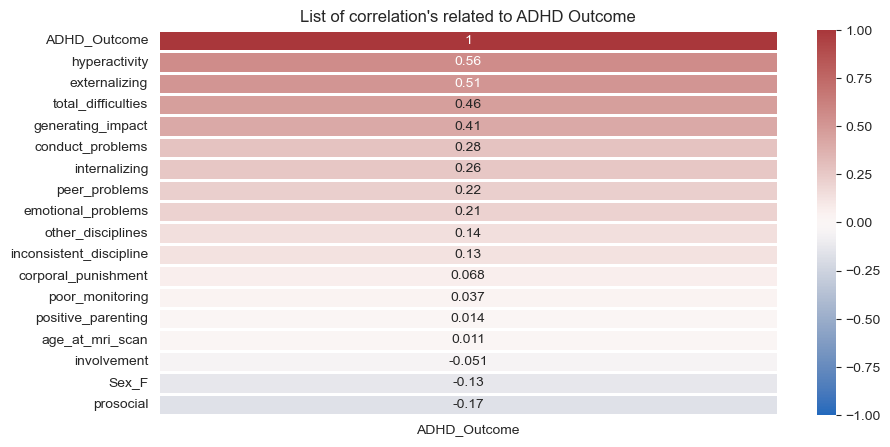

In [170]:

tempDF = pd.concat([qm_df_old, y], axis=1)


print(y.shape)
print(qm_df_old.shape)
print(tempDF.shape)

corr_matrix = tempDF.corr()

fig, ax = plt.subplots( figsize = (10, 5))
sns.set_style("whitegrid")
heat = sns.heatmap(corr_matrix[["ADHD_Outcome"]].sort_values(by='ADHD_Outcome', ascending=False), linewidth=1,annot=True, cmap = 'vlag', vmin=-1)
plt.title("List of correlation's related to ADHD Outcome")
plt.show()

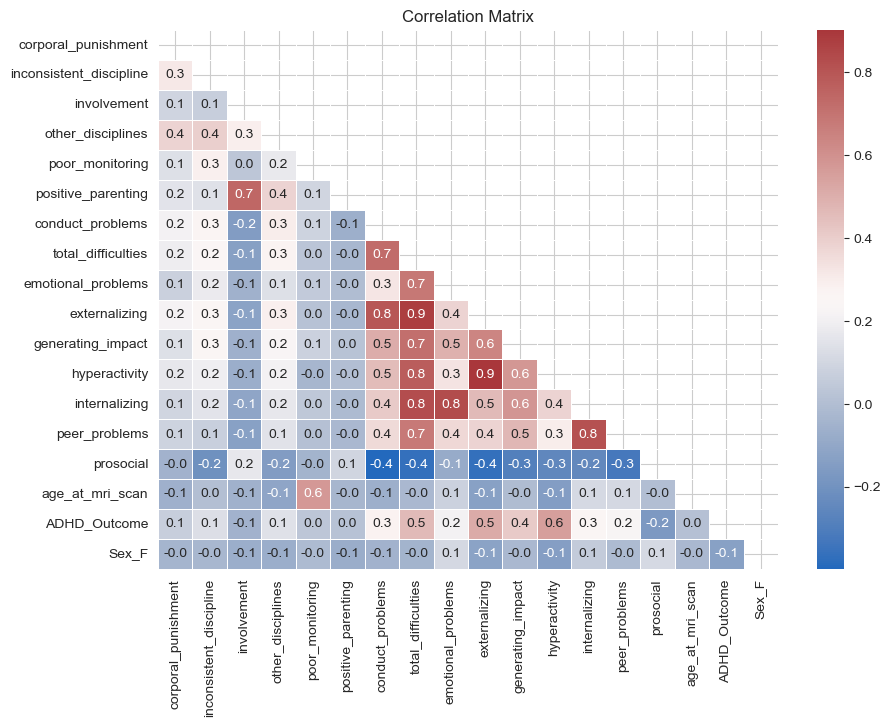

In [171]:

fig, ax = plt.subplots( figsize = (10, 7))

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='vlag', fmt=".1f", linewidths= .5)
plt.title('Correlation Matrix')
plt.show()

##### Observations of correlations

Based on the second table, I believe it's reasonable to exclude these features altogether:
- positive_parenting
- involvement


Based on the first table, I believe its reasonable to consider the following features for exclusion in direct prediction of ADHD outcome
- corporal_punishment
- poor_monitoring
- positive_parenting
- age_at_mri_scan


It's important to consider features such as Internalizing and Externalizing which have high correlation with other features due to them being derived from them. (i.e. internalizing is derived from emotional problems and peer problems)

### Feature engineering

Will skip any feature engineering for now and just remove irrelevant columns. To be improved upon later.

In [172]:
if "corporal_punishment" in qm_df.columns:
    qm_df = qm_df.drop(columns=['corporal_punishment'])
if "poor_monitoring" in qm_df.columns:
    qm_df = qm_df.drop(columns=['poor_monitoring'])
if "positive_parenting" in qm_df.columns:
    qm_df = qm_df.drop(columns=['positive_parenting'])
if "age_at_mri_scan" in qm_df.columns:
    qm_df = qm_df.drop(columns=['age_at_mri_scan'])

### More Feature removing based on findings

These features had no correlation with ADHD_outcome as well as no correlation with other features.

In [173]:
if "positive_parenting" in qm_df.columns:
    qm_df = qm_df.drop(columns=['positive_parenting'])
    qm_df_old = qm_df_old.drop(columns=['positive_parenting'])
if "involvement" in qm_df.columns: #Note this feature kind of depends on positive_parenting.
    qm_df = qm_df.drop(columns=['involvement'])
    qm_df_old = qm_df_old.drop(columns=['involvement'])

### Dealing with NaN

Note from previous output, there are 21 total rows with NaN values, therefore we will drop them while maybe considering imputation for later.

In [174]:
def find_nan(df):
    print((df.isna().sum() != 0)[(df.isna().sum() != 0) == True]) #Returns columns with NaN vals
    print(df.isna().sum()[(df.isna().sum() != 0)[(df.isna().sum() != 0) == True].index]) #Returns how many NaN vals for each column
    rows_with_nan = df.index[df.isna().any(axis=1)].tolist() # find indices in dataframe
    print("Total rows with NaN values:",len(rows_with_nan))

    return rows_with_nan #returns indices of rows with NaN values used for further inspection.

In [175]:
print("\nqm_df NaN values: ")
qm_rows_with_nan_indices = find_nan(qm_df)


qm_df NaN values: 
inconsistent_discipline    True
other_disciplines          True
conduct_problems           True
total_difficulties         True
emotional_problems         True
externalizing              True
generating_impact          True
hyperactivity              True
internalizing              True
peer_problems              True
prosocial                  True
dtype: bool
inconsistent_discipline    12
other_disciplines          12
conduct_problems            9
total_difficulties          9
emotional_problems          9
externalizing               9
generating_impact           9
hyperactivity               9
internalizing               9
peer_problems               9
prosocial                   9
dtype: int64
Total rows with NaN values: 21


In [176]:
print(qm_df.shape)

try:
    qm_df = qm_df.drop(qm_rows_with_nan_indices, axis=0)
except:
    print("Already dropped")

print(qm_df.shape)
_ = find_nan(qm_df)

(1213, 11)
(1192, 11)
Series([], dtype: bool)
Series([], dtype: int64)
Total rows with NaN values: 0


### Normalization per each feature

In [177]:
#Features with no preset scale
#feature for normal dist. z-score scaling
"""
note internalizing is based on peer problems and emotional problems,
while externalizing is based on conduct problems and hyperactivity scores.
"""

normalize_features = ["corporal_punishment", "inconsistent_discipline", "involvement", "other_disciplines", "poor_monitoring",
                      "positive_parenting", "internalizing", "externalizing", "generating_impact"]

def normalize_column(column):
    mean = column.mean()
    std = column.std()
    return (column - mean) / std

for feature in normalize_features:
    if feature in qm_df.columns:
        qm_df[feature] = normalize_column(qm_df[feature])



# FOR FEATURES WITH PRESET SCALES
scales = {
    'conduct_problems': (0, 10),
    'total_difficulties': (0, 40),
    'emotional_problems': (0, 10),
    'hyperactivity': (0, 10),
    'peer_problems': (0, 10),
    'prosocial': (0, 10)
}

#normalize with regard to its preset scale
for feature in scales.keys():
    if feature in qm_df.columns:
        qm_df[feature] = (qm_df[feature] - scales[feature][0]) / (scales[feature][1] - scales[feature][0])


In [178]:
qm_df

,inconsistent_discipline,other_disciplines,conduct_problems,total_difficulties,emotional_problems,externalizing,generating_impact,hyperactivity,internalizing,peer_problems,prosocial
0,0.464739,-1.185075,0.3,0.425,0.4,0.815587,0.312319,0.8,0.398052,0.2,0.9
1,-0.371651,2.113313,0.5,0.500,0.4,1.299499,0.312319,0.8,0.682852,0.3,0.8
2,2.137517,0.014339,0.3,0.600,0.7,0.573631,2.091881,0.7,2.676457,0.7,0.7
3,-0.650447,-0.885222,0.0,0.125,0.0,-1.120062,-1.467243,0.3,-0.741151,0.2,0.6
4,-0.371651,1.213752,0.6,0.575,0.7,1.783411,1.380056,0.9,0.967653,0.1,0.4
...,...,...,...,...,...,...,...,...,...,...,...
1208,0.185942,0.014339,0.5,0.500,0.5,1.299499,0.312319,0.8,0.682852,0.2,0.8
1209,1.301128,0.913899,0.2,0.125,0.0,-0.636150,-1.467243,0.3,-1.310752,0.0,0.7
1210,1.579924,0.614045,0.2,0.350,0.3,0.331675,-0.399506,0.7,0.113251,0.2,0.9
1211,-1.208040,1.513606,0.1,0.250,0.0,0.089719,0.312319,0.7,-0.741151,0.2,0.7


## Categorical Metadata Dataset

### Describing Features


<br>

**Year of enrollment**
<br>

**Basic_Demos_Enroll_Year**

<br>

**Site of phenotypic testing**
<br>
- 1=Staten Island,
- 2=MRV,
- 3=Midtown,
- 4=Harlem,
- 5=SI RUMC
<br>

**Basic_Demos_Study_Site**

<br>

**Ethnicity of child**
<br>
- 0= Not Hispanic or Latino,
- 1= Hispanic or Latino,
- 2= Decline to specify,
- 3= Unknown
<br>

**PreInt_Demos_Fam_Child_Ethnicity**

<br>

**Race of child**
<br>
- 0= White/Caucasian
- 1= Black/African American
- 2= Hispanic
- 3= Asian
- 4= Indian
- 5= Native American Indian
- 6= American Indian/Alaskan Native
- 7= Native Hawaiian/Other Pacific Islander
- 8= Two or more races
- 9= Other race
- 10= Unknown
- 11=Choose not to specify
<br>

**PreInt_Demos_Fam_Child_Race**

<br>

**Scan location**
<br>
- 1=Staten Island
- 2=RUBIC
- 3=CBIC
- 4=CUNY
<br>

**MRI_Track_Scan_Location**

<br>

**Parent 1 level of education**
<br>
- 3=Less than 7th grade
- 6=Junior high/Middle school (9th grade)
- 9=Partial high school (10th or 11th grade)
- 12=High school graduate
- 15=Partial college (at least one year)
- 18=College education
- 21=Graduate degree
<br>

**Barratt_Barratt_P1_Edu**

<br>

**Parent 1 occupation**
<br>
- 0=Homemaker, stay at home parent.
- 5=Day laborer, janitor, house cleaner, farm worker, food counter sales, food preparation worker, busboy.
- 10=Garbage collector, short-order cook, cab driver, shoe sales, assembly line workers, masons, baggage porter.
- 15=Painter, skilled construction trade, sales clerk, truck driver, cook, sales counter or general office clerk.
- 20=Automobile mechanic, typist, locksmith, farmer, carpenter, receptionist, construction laborer, hairdresser.
- 25=Machinist, musician, bookkeeper, secretary, insurance sales, cabinet maker, personnel specialist, welder.
- 30=Supervisor, librarian, aircraft mechanic, artist and artisan, electrician, administrator, military enlisted personnel, buyer.
- 35=Nurse, skilled technician, medical technician, counselor, manager, police and fire personnel, financial manager, physical, occupational, speech therapist.
- 40=Mechanical, nuclear, and electrical engineer, educational administrator, veterinarian, military officer, elementary, high school and special education teacher.
- 45=Physician, attorney, professor, chemical and aerospace engineer, judge, CEO, senior manager, public official, psychologist, pharmacist, accountant.
<br>

**Barratt_Barratt_P1_Occ**

<br>

**Parent 2 level of education**
<br>

**Barratt_Barratt_P2_Edu**

<br>

**Parent 2 occupation**
<br>

**Barratt_Barratt_P2_Occ**

### Renaming Features

For better interpretability

In [179]:
cat_rename_dict = {"Basic_Demos_Enroll_Year": "enroll_year", "Basic_Demos_Study_Site": "study_site",
                   "PreInt_Demos_Fam_Child_Ethnicity": "ethnicity", "PreInt_Demos_Fam_Child_Race": "race",
                   "MRI_Track_Scan_Location": "scan_site", "Barratt_Barratt_P1_Edu": "p1_education", "Barratt_Barratt_P1_Occ": "p1_occ",
                   "Barratt_Barratt_P2_Edu": "p2_education", "Barratt_Barratt_P2_Occ": "p2_occ",}

try:
    cm_df = cm_df.rename(columns=cat_rename_dict)
except:
    print("Already dropped")


### Initial Feature Drop

Columns believed to have no effect on ADHD_Outcome

In [180]:
if "enroll_year" in cm_df.columns:
    cm_df = cm_df.drop(columns=['enroll_year'])
if "participant_id" in cm_df.columns:
    cm_df = cm_df.drop(columns=['participant_id'])

### Dummy Variable

In [181]:
study_site_dict = {
    1: "Staten Island",
    2: "MRV",
    3: "Midtown",
    4: "Harlem",
    5: "SI RUMC"
}
ethnicity_dict = {
    0: "Not Hispanic or Latino",
    1: "Hispanic or Latino",
    2: "Decline to specify",
    3: "Unknown"
}
race_dict = {
    0: "White/Caucasian",
    1: "Black/African American",
    2: "Hispanic",
    3: "Asian",
    4: "Indian",
    5: "Native American Indian",
    6: "American Indian/Alaskan Native",
    7: "Native Hawaiian/Other Pacific Islander",
    8: "Two or more races",
    9: "Other race",
    10: "Unknown",
    11: "Choose not to specify"
}
scan_location_dict = {
    1: "Staten Island",
    2: "RUBIC",
    3: "CBIC",
    4: "CUNY"
}
edu_dict = {
    3: "7th grade or less",
    6: "9th grade",
    9: "10th or 11th grade",
    12: "HS graduate",
    15: "Partial college",
    18: "College education",
    21: "Graduate degree"
}

occupation_dict = {
    0: "stay at home",
    5: "cat1",
    10: "cat2",
    15: "cat3",
    20: "cat4",
    25: "cat5",
    30: "cat6",
    35: "cat7",
    40: "cat8",
    45: "cat9"
}

"""
    stay at home: "stay at home",
    cat1: "Day laborer, janitor, house cleaner, farm worker, food counter sales, food preparation worker, busboy",
    cat2: "Garbage collector, short-order cook, cab driver, shoe sales, assembly line workers, masons, baggage porter",
    cat3: "Painter, skilled construction trade, sales clerk, truck driver, cook, sales counter or general office clerk",
    cat4: "Automobile mechanic, typist, locksmith, farmer, carpenter, receptionist, construction laborer, hairdresser",
    cat5: "Machinist, musician, bookkeeper, secretary, insurance sales, cabinet maker, personnel specialist, welder",
    cat6: "Supervisor, librarian, aircraft mechanic, artist and artisan, electrician, administrator, military enlisted personnel, buyer",
    cat7: "Nurse, skilled technician, medical technician, counselor, manager, police and fire personnel, financial manager, physical, occupational, speech therapist",
    cat8: "Mechanical, nuclear, and electrical engineer, educational administrator, veterinarian, military officer, elementary, high school and special education teacher",
    cat9: "Physician, attorney, professor, chemical and aerospace engineer, judge, CEO, senior manager, public official, psychologist, pharmacist, accountant"
"""


cm_df["study_site"] = cm_df["study_site"].map(study_site_dict)
cm_df["scan_site"] = cm_df["scan_site"].map(scan_location_dict)

cm_df["ethnicity"] = cm_df["ethnicity"].map(ethnicity_dict)
cm_df["race"] = cm_df["race"].map(race_dict)
cm_df["p1_education"] = cm_df["p1_education"].map(edu_dict)
cm_df["p1_occ"] = cm_df["p1_occ"].map(occupation_dict)
cm_df["p2_education"] = cm_df["p2_education"].map(edu_dict)
cm_df["p2_occ"] = cm_df["p2_occ"].map(occupation_dict)

cm_df_dummies = pd.get_dummies(cm_df)

print(cm_df_dummies)

      study_site_Harlem  study_site_MRV  study_site_Midtown  \
0                  True           False               False   
1                 False           False               False   
2                 False           False               False   
3                 False           False               False   
4                 False           False               False   
...                 ...             ...                 ...   
1208               True           False               False   
1209              False           False               False   
1210              False           False                True   
1211               True           False               False   
1212              False           False               False   

      study_site_Staten Island  ethnicity_Decline to specify  \
0                        False                         False   
1                         True                         False   
2                         True                     

### Correlation Matrix